In [53]:
import pandas as pd
import numpy as np

In [54]:
data = pd.read_csv('D2_Grades_Dataset.csv')

In [55]:
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [56]:
columns = data.columns
columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [57]:
data.shape

(571, 43)

In [58]:
data.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [59]:
# for filling the missing values we can take the mode of grades for each course,
# because it is more likely th a person can get a grade which is getting by the majority of students

# Since majority of courses has missing values, so data is noisy. We can remove the 
# missing values by simply removing them, but since we already have less dataset, we cant remove them
# instead we replace these null values with mode of each column

In [60]:
features_with_null = [features for features in data if data[features].isnull().sum()]  # list will return with features that have null values
for each_feature in features_with_null:
    data[each_feature] = data[each_feature].fillna(data[each_feature].mode()[0])

In [61]:
data.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [62]:
#encoding the data for categorical features
cat_fea = [i for i in data.columns if data[i].dtype == "O"]
cat_fea

['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412']

In [63]:
data["PH-121"].value_counts()

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
A+     22
D+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64

In [64]:
# here we are making key value pair of categorical column in fearures
# here we are defining a function 
def encode_cat(feature):   # function will take feature 
  mapping_dic = {}         # empty dic 
  unique_val = list(data[feature].unique())    # extract particular feature from data and convert into list 
  for idx in range(len(unique_val)):      #loop will run till the len of list 
    mapping_dic[unique_val[idx]] = idx    # assign the index to the index of the list 
  return mapping_dic       # return the feature 

In [65]:
data['CS-412'].nunique()

13

In [66]:
d = {'A+':4.0, 'A':4.0,'A-':3.7,'B+':3.3,'B':3.0,'B-':2.7,'C+':2.3,'C':2,'C-':1.7,'D+':1.3,'D':1.0,'F':0.0,'WU':0.0,'W':0.0}

In [67]:
for i in cat_fea:   # we have the list of categorical features 
  data[i] = data[i].map(d)
  print(data.head())

   Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0       NaN     B-     D+     C-         C     C-     D+      D     C-     B-   
1       NaN      A      D     D+         D     B-      C      D      A     D+   
2       NaN      A      B      A        B-     B+      A     B-     B+     A-   
3       NaN      D     C+     D+         D      D     A-     D+     C-      D   
4       NaN     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]
   Seat No.  PH-

In [68]:
# drop seat no 
data.drop(['Seat No.'], axis=1)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.3,...,3.7,3.7,4.0,4.0,4.0,3.3,3.3,3.0,4.0,3.798
567,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.3,3.3,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772
568,3.0,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,3.0,...,3.7,3.0,4.0,3.3,4.0,2.0,3.3,3.7,3.7,3.470
569,4.0,3.3,1.0,4.0,1.0,1.3,2.7,1.7,2.7,1.7,...,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


In [69]:
# for year wise dataframe 
def course_per_year(year,year2=None,year3=None):
  column =[]
  for i in columns:
    if i[3] == str(year) or i[3] == str(year2) or i[3]==str(year3):
      column.append(i)
  df = data.loc[:,column].astype('float64')
  return df


In [93]:
#df_first.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107'],
      dtype='object')

In [70]:
# for first year dataset
df_first = course_per_year(1)
X = df_first.iloc[:,].values


In [71]:
# for target
target = data[['CGPA']]
y = target.iloc[:].values

In [72]:
# lets apply first model as Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
X_test.ndim

2

In [75]:
y_test.ndim

2

In [76]:
reg = LinearRegression()

In [77]:
reg.fit(X_train, y_train)

LinearRegression()

In [78]:
reg.score(X_train, y_train)

0.8423624670689657

In [79]:
print('reg.coef_',reg.coef_)
print('reg.intercept_',reg.intercept_)

reg.coef_ [[0.0441697  0.06855306 0.0497035  0.05364371 0.13661076 0.04481916
  0.11226231 0.09157395 0.08289264 0.12357499 0.04516272]]
reg.intercept_ [0.45756043]


In [80]:
X_test[5]

array([3.3, 3. , 4. , 3.7, 4. , 3.3, 3.7, 4. , 3.7, 3. , 3.3])

In [81]:
y_test[0]

array([1.992])

In [82]:
import pickle

In [83]:
pickle.dump(reg, open('first_gpa.pkl', 'wb'))

In [84]:
mod = pickle.load(open('first_gpa.pkl', 'rb'))
mod.predict((np.array([2. , 4. , 4. , 1.7, 1.3, 2.3, 2.7, 2. , 1.7, 1.3, 1.7]).reshape(1,-1)))

array([[2.25539619]])

In [85]:
X_test[np.isnan(X_test)] = 0

In [86]:
y_pred = reg.predict(X_test)

In [87]:
#pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\A.ZEE COMPUTERS\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
#coef_ and intercept_ are coefficients and intercepts resp. for our model
print("Coefficients:\n",reg.coef_)
print("Intercept:\n",reg.intercept_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients:
 [[0.0441697  0.06855306 0.0497035  0.05364371 0.13661076 0.04481916
  0.11226231 0.09157395 0.08289264 0.12357499 0.04516272]]
Intercept:
 [0.45756043]
Mean squared error: 0.06
Variance score: 0.81


In [34]:
# forSecond Year
df_first = course_per_year(1,2)
X = df_first.iloc[:,].values
# for target
target = data[['CGPA']]
y = target.iloc[:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LinearRegression()
X_test[np.isnan(X_test)] = 0
X_train[np.isnan(X_train)] = 0
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

#coef_ and intercept_ are coefficients and intercepts resp. for our model
print("Coefficients:\n",reg.coef_)
print("Intercept:\n",reg.intercept_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))



Coefficients:
 [[ 0.05541668  0.06705055  0.03276974  0.02873467  0.0371754   0.05961067
   0.08136935  0.03529867  0.04787958  0.05082139  0.05408169  0.0668205
  -0.00281148 -0.00027835  0.0824843   0.10762294  0.01583569 -0.00400802
   0.06780834  0.02404805  0.00714161  0.0199633 ]]
Intercept:
 [0.19230752]
Mean squared error: 0.03
Variance score: 0.92


Here we got 92% accuracy

In [35]:
X_test[6]

array([2.3, 3.7, 3.3, 2.7, 2. , 3.7, 3.3, 1.7, 2. , 1.7, 3.7, 2. , 1.3,
       4. , 1.3, 3.3, 1.3, 3. , 3.3, 2. , 3.3, 2. ])

In [ ]:
import pickle

In [38]:
y_test.shape

(172, 1)

In [39]:
x = X_test[:,1]


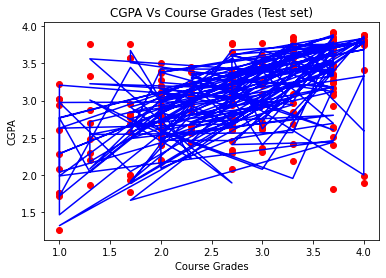

In [40]:
#Plotting the graph for test dataset
plt.scatter(x, y_test, color = 'red')
plt.plot(x, y_pred, color = 'blue')
plt.title('CGPA Vs Course Grades (Test set)')
plt.xlabel('Course Grades')
plt.ylabel('CGPA')
plt.show()

### Another ML Algorithm

In [41]:
import xgboost as xgb
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [42]:
model = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [43]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [44]:
# force scores to be positive
#scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: -0.132 (0.025)


In [45]:
# define model
model = xgb.XGBRegressor()
# fit model
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [46]:
# make a prediction
yhat = model.predict(X_test)
#yhat = yhat.reshape(-1,1)
# summarize prediction
#print('Predicted: %.3f' % yhat)

In [47]:
yhat

array([2.728081 , 3.5071352, 2.5146515, 2.1702225, 3.8335922, 3.4073117,
       2.9522018, 2.373146 , 2.1387784, 2.8776672, 3.4424398, 2.945673 ,
       3.7147505, 2.475877 , 3.864846 , 2.2924404, 2.3536227, 3.7125587,
       1.8297178, 2.5583928, 2.2030997, 3.753627 , 2.4238598, 2.654416 ,
       3.0881886, 3.2145648, 3.0773604, 2.462127 , 3.3167787, 3.2686734,
       2.669479 , 2.6326623, 3.404696 , 3.4913538, 3.4346764, 3.3357747,
       2.6143858, 3.899639 , 2.7692392, 1.8094636, 3.555522 , 3.460362 ,
       3.5433095, 3.6476026, 3.193616 , 2.2343946, 2.1752677, 2.947691 ,
       3.2268336, 3.721289 , 3.265567 , 3.3459575, 3.2475133, 3.5445647,
       3.3025632, 2.9722722, 3.741551 , 3.7703114, 3.7080326, 2.6889703,
       3.6030974, 3.5464516, 3.854346 , 3.5374687, 3.0074096, 3.2309911,
       3.541591 , 3.1820188, 3.244995 , 2.5182104, 3.5431252, 3.2520998,
       2.814068 , 3.477313 , 3.9105847, 3.5786452, 3.3971062, 2.159141 ,
       3.8007386, 2.5242357, 2.4798958, 3.160899 , 

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
r2_score(y_test, yhat)

0.9223873831914721

In [50]:
import pickle
pickle.dump(model, open('iri.pkl', 'wb'))

In [51]:
model=pickle.load(open('iri.pkl','rb'))

In [52]:
X_test[5]

array([3.3, 3. , 4. , 3.7, 4. , 3.3, 3.7, 4. , 3.7, 3. , 3.3, 3.7, 2. ,
       2.3, 4. , 3.7, 3.3, 3.3, 3. , 3.3, 3.7, 3.7])

In [55]:
y_test[5]

array([3.476])

In [54]:
model.predict(np.array([3.3, 3. , 4. , 3.7, 4. , 3.3, 3.7, 4. , 3.7, 3. , 3.3, 3.7, 2. ,
       2.3, 4. , 3.7, 3.3, 3.3, 3. , 3.3, 3.7, 3.7]).reshape(1,-1))

array([3.4073117], dtype=float32)